### 4.1.1 Parse the fasta file (1 point)

How many sequences are contained in the file protein_N_data.fasta?
List the names of the sequences.

In [1]:
from Bio import SeqIO

records = SeqIO.parse(f"/home/henrik/BINF200_H23/assignments/data2/Coronavirus/Coronavirus/protein_N_data.fasta", "fasta")

#Names:
print(f" Names of sequences : {[r.name for r in records]} ")

records = SeqIO.parse(f"/home/henrik/BINF200_H23/assignments/data2/Coronavirus/Coronavirus/protein_N_data.fasta", "fasta")

#Lengths:
print(f" Length of induvidual sequences : {[len(r.seq) for r in records]} ")

records = SeqIO.parse(f"/home/henrik/BINF200_H23/assignments/data2/Coronavirus/Coronavirus/protein_N_data.fasta", "fasta")

#Amount of sequences:

records = SeqIO.parse(f"/home/henrik/BINF200_H23/assignments/data2/Coronavirus/Coronavirus/protein_N_data.fasta", "fasta")

length = len([r for r in records])
print(f" Number of of sequences: {length}")


 Names of sequences : ['Human_NL63_alpha', 'Bat_alpha', 'mink_alpha', 'camel_alpha', 'ferret_alpha', 'rat_alpha', 'rabbit_beta', 'MERS_beta', 'HKU24_beta', 'England1_beta', 'SARS_beta', 'whale_gamma', 'turkey_gamma', 'duck_gamma', 'goose_gamma', 'sparrow_delta', 'wigeon_delta', 'nightHeron_delta', 'moorhen_delta', 'porcine_delta'] 
 Length of induvidual sequences : [1134, 1278, 1131, 1149, 1128, 1176, 1335, 1242, 1332, 1236, 1260, 1140, 1230, 1245, 1245, 1029, 1053, 1029, 1056, 1029] 
 Number of of sequences: 20


### 4.1.2 Find protein N in a specific coronavirus genome (1 point)

From the sequences in protein_N_data.fasta, find the sequence for which the first letter
in its name is closest in the alphabet to the first letter in your first name. If there
are multiple sequences starting with the same letter, pick one arbitrarily. For the selected
sequence:

**Human_NL63_alpha**

• Find the assembly accession ID in the table above.
• Go to the NCBI website (cf. links above) and find the corresponding genome assembly.
• What are the genomic coordinates (start and end position) of gene N in this genome?
(Hint: follow the RefSeq link)


### ANSWER: 

Link to the gene ["gene"]("https://www.ncbi.nlm.nih.gov/gene/2943504/")

The genes range is : ***26133 - 27266*** 

### 4.1.3 Multiple sequence alignment (1 point)

Build a multiple sequence alignment for the protein_N_data using a multiple sequence
alignment tool of your choice. (Hint: check out the services provided by EMBL’s European
Bioinformatics Institute (EMBL-EBI).)

For this question i used:

https://www.bioinformatics.nl/cgi-bin/emboss/emma

and got out a file, containing aligned sequences.

### 4.1.4 Phylogenetic tree reconstruction (1 point)

Based on the results from the previous step, build a phylogenetic tree. (Hint: at this stage
it is not required to make an “advanced tree”, providing a simple tree is enough). Save the
image of the phylogenetic/guide tree.


Tree was made in this link:

https://www.ebi.ac.uk/Tools/services/web/toolresult.ebi?jobId=simple_phylogeny-I20231002-105856-0957-35098453-p1m

From the MSL

Image:

![tree](outdata2/treeout.png)



### 4.1.5 Interpretation (1 point)

Based on the results from the previous two steps, what do you see? Elaborate with a small
text (3-4 lines): Explain what you observe from the multiple sequence alignment itself (hint:
check the number of conserved sites), and give a short interpretation of the phylogenetic
tree you have constructed.

### ANSWER:

From the tree i can see that the viruses are grouped together by their "variants". What suprised me is that the tree shows that the different variants grouped off quite early. With the exception of gamma and delta, which grouped off from their own common ansector.

Having a look at the alignments, one can see some conserved regions within variants, this is very obvious when looking at turkey_gamma and duck_gamma.
Across variants, there are less conserved regions, as expected.


## 4.2 Step-by-step multiple sequence alignment and phylogenetic tree construction using UPGMA (Total points: 10)

### 4.2.1 Compute pairwise similarities (2 points)

Use the Needleman-Wunsch (dynamic programming) pairwise alignment algorithm to build
a matrix of global alignment scores for each pair of sequences in protein_N_data.fasta.
You can choose between multiple options:
• Implement the Needleman-Wunsch algorithm yourself. (Hint: You have probably done
this already in BINF100)
• Use an existing implementation of the algorithm. (Hint: Check biopython, biojulia)
• Use the needleall command line program from the EMBOSS suite. (Hint: You installed
the whole EMBOSS suite for Assignment 1.)
• Use a webserver such as EMBL-EBI’s EMBOSS Needle service. (Hint: Manually
inputting every pair of sequences will be extremely tedious, though they do provide
APIs.)


In [2]:
from Bio import Align
from Bio import SeqIO
import pandas as pd

# ChatGTP4 was used to answer this question: by helping to create the logic of indexing dataframes

aligner = Align.PairwiseAligner()

sequences = list(SeqIO.parse(f"/home/henrik/BINF200_H23/assignments/data2/Coronavirus/Coronavirus/protein_N_data.fasta", "fasta"))
ids = [record.id for record in sequences]

scores_df = pd.DataFrame(index=ids, columns=ids)

for i in range(len(sequences)):
    for j in range(i, len(sequences)):
        alignments = aligner.align(sequences[i].seq, sequences[j].seq)

        score = alignments[0].score
        scores_df.iloc[i, j] = score
        scores_df.iloc[j, i] = score


print(scores_df)


                 Human_NL63_alpha Bat_alpha mink_alpha camel_alpha  \
Human_NL63_alpha           1134.0     829.0      775.0       798.0   
Bat_alpha                   829.0    1278.0      795.0       821.0   
mink_alpha                  775.0     795.0     1131.0       797.0   
camel_alpha                 798.0     821.0      797.0      1149.0   
ferret_alpha                767.0     789.0      902.0       778.0   
rat_alpha                   775.0     812.0      782.0       770.0   
rabbit_beta                 796.0     863.0      813.0       810.0   
MERS_beta                   764.0     821.0      779.0       784.0   
HKU24_beta                  788.0     837.0      816.0       811.0   
England1_beta               763.0     818.0      775.0       783.0   
SARS_beta                   773.0     830.0      799.0       786.0   
whale_gamma                 741.0     786.0      755.0       755.0   
turkey_gamma                768.0     815.0      783.0       773.0   
duck_gamma          

### 4.2.2 Generate a pairwise distance matrix (4 points)
Generate a distance matrix from the score matrix you have created in the previous step.
For this task we will use Feng & Doolittle’s formulation, and we will compute the distance
𝐷 using formula:
𝐷 = − log 𝑆𝑒𝑓𝑓 = − log 𝑆𝑜𝑏𝑠 − 𝑆𝑟𝑎𝑛𝑑
𝑆𝑚𝑎𝑥 − 𝑆𝑟𝑎𝑛𝑑
where
• 𝑆𝑜𝑏𝑠 is the observed pairwise alignment score
• 𝑆𝑚𝑎𝑥 is the best alignment score for both sequences, obtained by taking the average
of the score of aligning either sequence to itself
• 𝑆𝑟𝑎𝑛𝑑 is the expected (average) score for aligning two random sequences of the same
length and residue composition, obtained by random shuffling the nucleotide composition of the two sequences. (Hint: more info about the Feng & Doolittle can be found
at this URL: https://rna.informatik.uni-freiburg.de/Teaching/index.jsp?toolName=
Feng-Doolittle)
Compute 𝑆𝑟𝑎𝑛𝑑 by taking the average score of 10 pairwise alignments between random
sequences with the same sequence compositions as the original sequences

In [3]:
from math import log
from Bio import Align
from Bio import SeqIO
import pandas as pd
import random

aligner = Align.PairwiseAligner()

# ChatGTP4 was used to answer this question: by helping to create the logic of indexing dataframes

def calc_distance(Sobs,Smax,Srand):
    try:
        calc = (Sobs-Srand) / (Smax - Srand)
        return -1*log(calc)
    except ZeroDivisionError:
        return "NaN"
    except ValueError:
        return "NaN"


def calc_Srand(seq1,seq2):

    Srand_score = 0

    for _ in range(1):

        random1 = ''.join(random.sample(seq1,len(seq1)))
        random2 = ''.join(random.sample(seq2,len(seq2)))

        alignments = aligner.align(random1, random2)

        Srand_score += alignments[0].score

    return (Srand_score/10)

sequences = list(SeqIO.parse(f"/home/henrik/BINF200_H23/assignments/data2/Coronavirus/Coronavirus/protein_N_data.fasta", "fasta"))
ids = [record.id for record in sequences]

distance_df = pd.DataFrame(index=ids, columns=ids)

for i in range(len(sequences)):
    for j in range(i, len(sequences)):
        alignments = aligner.align(sequences[i].seq, sequences[j].seq)
        alignments_self = aligner.align(sequences[i].seq, sequences[i].seq)

        Smax = alignments_self[0].score
        Sobs = alignments[0].score
        Srand = calc_Srand(str(sequences[i].seq),str(sequences[j].seq))

        distance = calc_distance(Sobs,Smax,Srand)

        distance_df.iloc[i, j] = distance
        distance_df.iloc[j, i] = distance

print(distance_df)

                 Human_NL63_alpha Bat_alpha mink_alpha camel_alpha  \
Human_NL63_alpha             -0.0  0.340492   0.413468    0.381277   
Bat_alpha                0.340492      -0.0   0.514777    0.479535   
mink_alpha               0.413468  0.514777       -0.0    0.379781   
camel_alpha              0.381277  0.479535   0.379781        -0.0   
ferret_alpha             0.425044  0.523175   0.244072    0.423249   
rat_alpha                0.413903  0.492363   0.400886    0.435335   
rabbit_beta              0.386265  0.427679    0.36031    0.381087   
MERS_beta                 0.43055   0.48144   0.406319    0.416492   
HKU24_beta               0.397163  0.461146   0.356023    0.380022   
England1_beta            0.431801  0.485038   0.411984    0.417811   
SARS_beta                0.418086  0.469385   0.378148    0.413617   
whale_gamma              0.462901  0.527575   0.439575    0.456514   
turkey_gamma                0.424   0.48917   0.400172     0.43173   
duck_gamma          

### 4.2.3 Generate a “guide tree” of phylogenetic relationships (2 points)
Generate a “guide tree” of phylogenetic relationships from the pairwise distance matrix you
have created in the previous step using the UPGMA method. You can choose between
multiple options:
• Implement the UPGMA hierarchical clustering algorithm yourself. (Hint: You can
represent the tree as a binary tree, either implementing a tree class yourself, or using
an existing data structure.)
• Use an existing implementation of the algorithm. (Hint: UPGMA is more commonly
known as hierarchical clustering with average linkage. Check SciPy or similar packages
for other languages.)


{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [155.0, 155.0, 180.0, 180.0],
  [145.0, 145.0, 167.5, 167.5],
  [122.5, 122.5, 156.25, 156.25],
  [100.0, 100.0, 139.375, 139.375],
  [63.75, 63.75, 119.6875, 119.6875],
  [14.375, 14.375, 91.71875, 91.71875]],
 'dcoord': [[0.0, 0.058853096186771967, 0.058853096186771967, 0.0],
  [0.0, 0.3318511335637927, 0.3318511335637927, 0.058853096186771967],
  [0.0, 0.36891204245740133, 0.36891204245740133, 0.3318511335637927],
  [0.0, 0.3798113981506799, 0.3798113981506799, 0.36891204245740133],
  [0.0, 0.24205659268765672, 0.24205659268765672, 0.0],
  [0.0, 0.3357413017017208, 0.3357413017017208, 0.24205

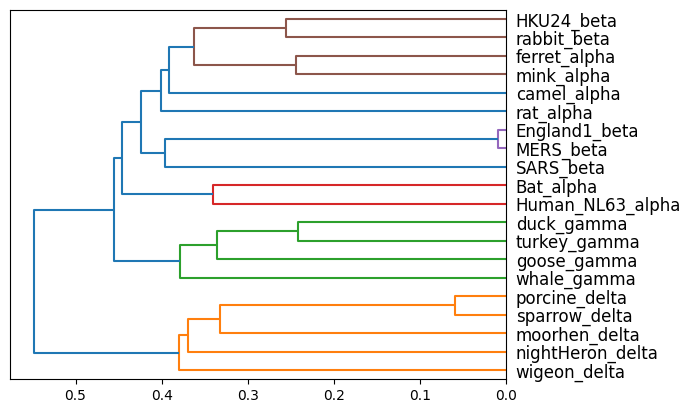

In [4]:
from scipy import cluster
from scipy.spatial import distance

# ChatGTP4 was used to answer this question: by helping to find how to impliment the functions from docs:
#docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy-cluster-hierarchy-linkage

dist_condensed = distance.squareform(distance_df)

clust = cluster.hierarchy.linkage(dist_condensed, method='average')

cluster.hierarchy.dendrogram(clust, labels=distance_df.columns, orientation="left")

### 4.2.4 Interpret your results (2 points)
Visualize your guide tree and compare it to the phylogenetic tree constructed in Section 4.1.4.
Elaborate with a small text (3-4 lines) to explain what you observe.

### ANSWER:

My guide tree is a bit more "nested" than the 4.1.4 tree. My tree suggest that delta and all the other variants diverged very early. 
Interestingly, whule the 4.1.4 tree groups all viruses  according to their variants, this new tree does not take quite the same approach. While many are grouped by variants, examples such as the bat and alpha, are quite a ways way from the other alpha values. 


### 4.3 Sequence motifs (Total points: 5)

Do simple motif searching on corona virus sequences using the input dataset (protein_N_data.fasta)
we have already analysed.

### 4.3.1 MEME analysis (1 point)

Connect to the MEME platform at https://meme-suite.org/.
• Find the MEME motif discovery tool.
• Input protein_N_data.fasta to discover enriched motifs in this set of sequences,
allowing for zero or one motif occurrence per sequence and finding upto 5 motifs.
Which discovery mode, sequence alphabet, and site distribution options do you select?
Open and download the MEME HTML output file and include the sequence logos of
the motifs found in your report

### Which discovery mode, sequence alphabet, and site distribution options do you select?'

### ANSWER:

I chose this stuff since the question specified so, but also:

I used classic mode, since i provide ONE set of sequences and am looking for motifs in this set.

I chose DNA/RNA/Protein for alphabet since we are working with DNA

I chose zero or one motif occurrence per sequence because it can strengthen the finds if we expect to find induvidual domain sequences.



https://meme-suite.org/meme/tools/meme



**SEQUENCE LOGOS:**

![logos](outdata2/logos.png)



### 4.3.2 Convert count matrix to PWM (2 points)

We will work with a 20-nucleotide subset of the first motif found by the MEME software,
given by the count matrix:
Figure 2: Motif count matrix
The count matrix is also available as a file motifCountMatrix.csv.
1. Compare the count matrix against your sequence logos and mark the 20-nucleotide
window corresponding to this count matrix in the right logo.
2. Convert the count matrix to a position-specific probability matrix (PPM) 𝑃. To avoid
zeros in the PPM, we add pseudo-counts and define
𝑃𝑘,𝑖 =
Count𝑘,𝑖 + 0.25 ∗ √
𝑁
𝑁 + √
𝑁
,
where Count𝑘,𝑖 is the value of the count matrix for nucleotide 𝑘 in motif position 𝑖, and
𝑁 is the number of sequences in protein_N_data.fasta (Hint: Count the totals in
each column of the count matrix).
3. Convert the PPM matrix to a position-specific weight matrix (PWM) 𝑊 using the
formula
𝑊𝑘,𝑖 = log2
𝑃𝑘,𝑖
0.25
6
What would be the value of 𝑊 for a random background site with equal counts for
all nucleotides and using the pseudo-count formula above to compute the random
probabilities?

-------------------------------------

1. Compare the count matrix against your sequence logos and mark the 20-nucleotide
window corresponding to this count matrix in the right logo.

Logo 1 is correct: starts at position 7 to 27

![Alt text](outdata2/window.png)

In [5]:
# 2. Convert the count matrix to a position-specific probability matrix (PPM) 𝑃.

from math import sqrt
import pandas as pd

csv = pd.read_csv("/home/henrik/BINF200_H23/assignments/data2/Coronavirus/Coronavirus/motifCountMatrix.csv")
prob_df = csv.copy()

def calculate_ppm(count,N):
    return (count + (0.25*sqrt(N))) / ( N + sqrt(N) )

for i in range(len(csv.index)):
    for j in range(1, len(csv.columns)):  

        count = csv.iloc[i,j]              
        N = 20                          
        prob_df.iloc[i, j] = calculate_ppm(count,N)
    

print(prob_df)

  base\position         1         2         3         4         5         6  \
0             A  0.045686  0.045686  0.045686  0.045686  0.862942  0.045686   
1             C  0.045686  0.045686  0.536040  0.045686  0.045686  0.372588   
2             G  0.045686  0.045686  0.045686  0.045686  0.045686  0.045686   
3             T  0.862942  0.862942  0.372588  0.862942  0.045686  0.536040   

          7         8         9  ...        11        12        13        14  \
0  0.045686  0.822079  0.045686  ...  0.045686  0.290863  0.045686  0.045686   
1  0.045686  0.045686  0.372588  ...  0.495177  0.086549  0.045686  0.045686   
2  0.045686  0.045686  0.045686  ...  0.045686  0.168274  0.862942  0.862942   
3  0.862942  0.086549  0.536040  ...  0.413451  0.454314  0.045686  0.045686   

         15        16        17        18        19        20  
0  0.372588  0.862942  0.045686  0.413451  0.045686  0.045686  
1  0.331726  0.045686  0.862942  0.045686  0.045686  0.045686  
2  0.045686

/tmp/ipykernel_95077/110000536.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.045685999407889206' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prob_df.iloc[i, j] = calculate_ppm(count,N)
/tmp/ipykernel_95077/110000536.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.8629420017763323' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prob_df.iloc[i, j] = calculate_ppm(count,N)
/tmp/ipykernel_95077/110000536.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.8220792016579102' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prob_df.iloc[i, j] = calculate_ppm(count,N)
/tmp/ipykernel_95077/110000536.py:17: FutureWarning: Setting an item of

In [6]:
#3. Convert the PPM matrix to a position-specific weight matrix (PWM) 𝑊 

from math import log2

weight_df = prob_df.copy()

def calculate_weight(prob):
    return log2(prob/0.25)

for i in range(len(prob_df.index)):
    for j in range(1, len(prob_df.columns)):  

        prob = prob_df.iloc[i,j]              
        N = 20                          
        weight_df.iloc[i, j] = calculate_weight(prob)
    
print(weight_df)

  base\position         1         2         3         4         5         6  \
0             A -2.452104 -2.452104 -2.452104 -2.452104  1.787336 -2.452104   
1             C -2.452104 -2.452104  1.100411 -2.452104 -2.452104  0.575655   
2             G -2.452104 -2.452104 -2.452104 -2.452104 -2.452104 -2.452104   
3             T  1.787336  1.787336  0.575655  1.787336 -2.452104  1.100411   

          7         8         9  ...        11        12        13        14  \
0 -2.452104  1.717349 -2.452104  ... -2.452104  0.218411 -2.452104 -2.452104   
1 -2.452104 -2.452104  0.575655  ...  0.986016 -1.530342 -2.452104 -2.452104   
2 -2.452104 -2.452104 -2.452104  ... -2.452104 -0.571112  1.787336  1.787336   
3  1.787336 -1.530342  1.100411  ...  0.725789  0.861762 -2.452104 -2.452104   

         15        16        17        18        19        20  
0  0.575655  1.787336 -2.452104  0.725789 -2.452104 -2.452104  
1  0.408062 -2.452104  1.787336 -2.452104 -2.452104 -2.452104  
2 -2.452104

In [7]:
# 3. What would be the value of 𝑊 for a random background site with equal counts for
# all nucleotides and using the pseudo-count formula above to compute the random
# probabilities?

def calculate_weight(prob):
    return log2(prob/0.25)

print(f"W for equal counts for all nucleotides = {calculate_weight(0.25)}")



W for equal counts for all nucleotides = 0.0


    ### 4.3.3 Scan a coronavirus genome for motif occurrences (2 points)
    Scan part of the BetaCoV/Wuhan/IPBCAMS-WH-02/2019 genome (the sequence in the file
    GCA_011537005.1_partial_genomic.fasta) and score all possible motif occurrences.
    Use the sliding window approach presented in the lecture and report (figure) both the logodds score and the odds of each possible motif starting position in the genome sequence.
    Elaborate with a small text (3-4 lines) to explain what you observe.

Best match = {'2322-2342'} with a score of 12.976106194772267


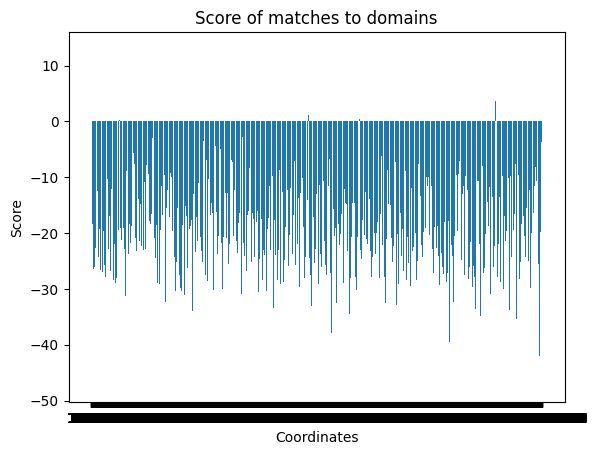

In [8]:
import matplotlib.pyplot as plt

genome = SeqIO.read("/home/henrik/BINF200_H23/assignments/data2/Coronavirus/Coronavirus/GCA_011537005.1_partial_genomic.fasta","fasta")
motif = "TTCTATTATACTGGAACTGG" #this is the nucleocapsid

weight_dict = weight_df.set_index('base\position').T.to_dict('list')

seq = genome.seq.upper()

out_dict = {}

for i in range(1,len(seq)-len(motif)):
    looking = seq[i:i+len(motif)]

    score = 0

    # ChatGTP4 was used to answer this question: it gave the idea of converting weight_df to dict
    # Which allowed for easier indexing.

    for j,letter in enumerate(looking):
        score += weight_dict[letter][j]
    
    out_dict[f"{i}-{i+len(motif)}"] = score


bestmatch = max(out_dict.values())
bestval = {k for k in out_dict if out_dict[k] == bestmatch}

print(f"Best match = {bestval} with a score of {bestmatch}")


plt.bar(*zip(*out_dict.items()))
plt.title("Score of matches to domains")
plt.xlabel("Coordinates")
plt.ylabel("Score")
plt.show()

# Match is found! At {'2322-2342'} with a score of 12.976


### Elaborate with a small text (3-4 lines) to explain what you observe.

A match is found At {'2322-2342'} with a score of 12.976.
What i see in the graph is that most lines in the BetaCoV/Wuhan/IPBCAMS-WH-02/2019 do not match, and therefore have a negative score. There is one "window" which matches quite well, and it is at index 2322-2342. It also shows us that there is only one copy of this motif in the given dna.